<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Assignment-1:-Uninformed-Search" data-toc-modified-id="Assignment-1:-Uninformed-Search-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Assignment 1: Uninformed Search</a></span></li><li><span><a href="#Required-Code" data-toc-modified-id="Required-Code-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Required Code</a></span></li><li><span><a href="#Example-1" data-toc-modified-id="Example-1-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Example 1</a></span></li><li><span><a href="#Example-2" data-toc-modified-id="Example-2-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Example 2</a></span></li><li><span><a href="#Required-Modification-to-the-Grid-Puzzle-(worth-20-points)" data-toc-modified-id="Required-Modification-to-the-Grid-Puzzle-(worth-20-points)-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Required Modification to the Grid Puzzle (worth 20 points)</a></span></li><li><span><a href="#Extra-Credit" data-toc-modified-id="Extra-Credit-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Extra Credit</a></span></li><li><span><a href="#Grading" data-toc-modified-id="Grading-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Grading</a></span></li><li><span><a href="#Check-in" data-toc-modified-id="Check-in-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Check-in</a></span></li></ul></div>

# Assignment 1: Uninformed Search

* *A1.1: First paragraph is changed. It no longer mentions a requirement of applying your search functions to a puzzle of your choice.*

*Type your name here*

Breadth-first and depth-first are two algorithms for performing
uninformed search---a search that does not use
knowledge about the goal of the search.  You will implement both
search algorithms in python and test them on a simple graph.  Then you
will apply your search algorithms to the grid navigation problem that you modify
as explained below.

# Required Code

In this jupyter notebook, you must implement at least the following functions.  The first function, `search`, implements the algorithm shown at the end of Lecture Notes `03 Problem-Solving Agents`.

`solution_path = search(start_state, goal_state, successors_f, breadth_first)`
* `start_state`: single state where search starts
* `goal_state`: signle state that represents the goal
* `successors_f`: function that accepts a single argument that is a state and returns a list of states that can be reached in one step from the argument state
* `breadth_first`: `True` or `False`.  If `True`, `search` performs a breadth-first search. Otherwise it performs a depth-first search.
* `solution_path`: returned value that is either<br>
  * a list of states that shows the path found from the start state to the goal state, or<br>
  * the string `'Goal not found'` if the search has searched everywhere without finding the goal state.

The next two functions are very short, and just call `search`.  These are really just convenience functions so the user of your search algorithm does not need to know what the boolean-valued argument `breadth_first` means.

`solution_path = breadth_first_search(start_state, goal_state, successors_f)`
* `start_state`: single state where search starts
* `goal_state`: signle state that represents the goal
* `successors_f`: function that accepts a single argument that is a state and returns a list of states that can be reached in one step from the argument state
* `solution_path`: returned value that is either<br>
  * a list of states that shows the path found from the start state to the goal state, or<br>
  * the string `'Goal not found'` if the search has searched everywhere without finding the goal state.


`solution_path = depth_first_search(start_state, goal_state, successors_f)`
* `start_state`: single state where search starts
* `goal_state`: signle state that represents the goal
* `successors_f`: function that accepts a single argument that is a state and returns a list of states that can be reached in one step from the argument state
* `solution_path`: returned value that is either<br>
  * a list of states that shows the path found from the start state to the goal state, or<br>
  * the string `'Goal not found'` if the search has searched everywhere without finding the goal state.

  
Each receives as arguments the starting state, the goal state, and a successors function.  If they succeed in finding the goal state, `breadth_first_search` returns the breadth-first solution path as a list of states starting with the `start_state` and ending with the `goal_state`.  `depth_first_search` returns the depth-first solution path.  If they do not success, they return the string `'Goal not found'`.

Test your code by running them with a simple graph as shown in the following example, and with the grid example. 

Test your code on other graphs, too.  <font color='red'>The final grading script will include graphs not shown here.</font>

In [1]:
def search(start_state, goal_state, successors_f, breadth_first):
    #state : parent
    expanded = {}
    #(state, parent state)
    un_expanded = [(start_state, None)]
    if start_state == goal_state:
        print("start_state == goal_state")
        return [start_state]
    #not not <empty list> = false, not not <nonempty list> = true
    while not not un_expanded:
        #parent[0] = state, parent[1] = parent
        parent = un_expanded.pop(len(un_expanded)-1)
        children = successors_f(parent[0])
        #change this?
        #should this be expanded[tuple(parent[0])] = parent[1]
        expanded[parent[0]] = parent[1]
        #find indices of duplicates
        delete_indices = []
        for j in expanded:
            delete_indices += [i for i, x in enumerate(children) if x == j]
            delete_indices += [i for i, x in enumerate(children) if x == expanded[j]]
        for j in range(len(un_expanded)):
            for k in range(2):
                delete_indices += [i for i, x in enumerate(children) if x == un_expanded[j][k]]
        delete_indices2 = []
        [delete_indices2.append(x) for x in delete_indices if x not in delete_indices2]
        delete_indices2.sort(reverse=True)
        for i in delete_indices2:
            del children[i]
        if goal_state in children:
            #print("goal in children!")
            solution_path = [parent[0], goal_state]
            while parent is not None and parent[1] is not None:
                solution_path.insert(0, parent[1])
                parent = (parent[1], expanded[parent[1]])
                if parent == start_state:
                    solution_path.insert(0, parent)
                    #print("parent == start_state")
                    return solution_path
            return solution_path
        else:
            children.sort(reverse=True)
            m_children = []
            for i in children:
                m_children.append((i, parent[0]))
            if breadth_first == True:
                un_expanded = m_children + un_expanded
            else:
                un_expanded = un_expanded + m_children
    return 'Goal not found'

In [2]:
def breadth_first_search(start_state, goal_state, successors_f):
    return search(start_state, goal_state, successors_f, True)

In [3]:
def depth_first_search(start_state, goal_state, successors_f):
    return search(start_state, goal_state, successors_f, False)

# Example 1

Here is a simple example.  States are defined by lower case letters.  A dictionary stores a list of successor states for each state in the graph that has successors.

In [4]:
successors = {'a':  ['b', 'c', 'd'],
              'b':  ['e', 'f', 'g'],
              'c':  ['a', 'h', 'i'],
              'd':  ['j', 'z'],
              'e':  ['a', 'k', 'l'],   # Watch out.  This creates the cycle a -> b -> e-> a
              'g':  ['m'],
              'k':  ['z']}
successors

{'a': ['b', 'c', 'd'],
 'b': ['e', 'f', 'g'],
 'c': ['a', 'h', 'i'],
 'd': ['j', 'z'],
 'e': ['a', 'k', 'l'],
 'g': ['m'],
 'k': ['z']}

Here is an example of a successors function that works for any search problem whose graph is explicitly represented with a successors dictionary as used in this example.

In [5]:
def successors_f(state): 
    successors = {'a':  ['b', 'c', 'd'],
                  'b':  ['e', 'f', 'g'],
                  'c':  ['a', 'h', 'i'],
                  'd':  ['j', 'z'],
                  'e':  ['a', 'k', 'l'],   # Watch out.  This creates the cycle a -> b -> e-> a
                  'g':  ['m'],
                  'k':  ['z']}
    return successors.get(state, [])

In [6]:
successors_f('a')

['b', 'c', 'd']

In [7]:
successors_f('e')

['a', 'k', 'l']

In [8]:
successors_f('q')

[]

In [9]:
print(breadth_first_search('a', 'a', successors_f))

start_state == goal_state
['a']


In [10]:
print(breadth_first_search('a', 'b', successors_f))

['a', 'b']


In [11]:
print(breadth_first_search('a', 'c', successors_f))

['a', 'c']


In [12]:
print(breadth_first_search('a', 'd', successors_f))

['a', 'd']


In [13]:
print(breadth_first_search('a', 'e', successors_f))

['a', 'b', 'e']


In [14]:
print(breadth_first_search('a', 'm', successors_f))

['a', 'b', 'g', 'm']


In [15]:
for goal in ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'z']:
    path = breadth_first_search('a', goal, successors_f)
    print(f'Path from a to {goal}: {path}')

start_state == goal_state
Path from a to a: ['a']
Path from a to b: ['a', 'b']
Path from a to c: ['a', 'c']
Path from a to d: ['a', 'd']
Path from a to e: ['a', 'b', 'e']
Path from a to f: ['a', 'b', 'f']
Path from a to g: ['a', 'b', 'g']
Path from a to h: ['a', 'c', 'h']
Path from a to i: ['a', 'c', 'i']
Path from a to j: ['a', 'd', 'j']
Path from a to k: ['a', 'b', 'e', 'k']
Path from a to l: ['a', 'b', 'e', 'l']
Path from a to m: ['a', 'b', 'g', 'm']
Path from a to z: ['a', 'd', 'z']


In [16]:
for goal in ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'z']:
    path = depth_first_search('a', goal, successors_f)
    print(f'Path from a to {goal}: {path}')

start_state == goal_state
Path from a to a: ['a']
Path from a to b: ['a', 'b']
Path from a to c: ['a', 'c']
Path from a to d: ['a', 'd']
Path from a to e: ['a', 'b', 'e']
Path from a to f: ['a', 'b', 'f']
Path from a to g: ['a', 'b', 'g']
Path from a to h: ['a', 'c', 'h']
Path from a to i: ['a', 'c', 'i']
Path from a to j: ['a', 'd', 'j']
Path from a to k: ['a', 'b', 'e', 'k']
Path from a to l: ['a', 'b', 'e', 'l']
Path from a to m: ['a', 'b', 'g', 'm']
Path from a to z: ['a', 'b', 'e', 'k', 'z']


# Example 2

Let's try a navigation problem around a grid of size 10 x 10. Rows and columns will be indexed from 0 to 9.

The following function takes the input state and returns all possible states.

In [17]:
def grid_successors(state):
    row, col = state
    # succs will be list of tuples () rather than list of lists [] because state must
    # be an immutable type to serve as a key in dictionary of expanded nodes
    succs = []
    for r in [-1, 0, 1]:   #check each row
        for c in [-1, 0, 1]:  # check in each col
            newr = row + r
            newc = col + c
            if 0 <= newr <= 9 and 0 <= newc <= 9:  
                succs.append( (newr, newc) )
    return succs

In [18]:
grid_successors([3,4])

[(2, 3), (2, 4), (2, 5), (3, 3), (3, 4), (3, 5), (4, 3), (4, 4), (4, 5)]

In [19]:
grid_successors([3,9])

[(2, 8), (2, 9), (3, 8), (3, 9), (4, 8), (4, 9)]

In [20]:
grid_successors([0,0])

[(0, 0), (0, 1), (1, 0), (1, 1)]

In [21]:
print('Breadth first')
print('path from (0, 0) to (9, 9) is', breadth_first_search((0, 0), (9, 9), grid_successors))

Breadth first
path from (0, 0) to (9, 9) is [(0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5), (6, 6), (7, 7), (8, 8), (9, 9)]


In [22]:
print('Depth-first')
print('path from (0, 0) to (9, 9) is', depth_first_search((0, 0), (9, 9), grid_successors))

Depth-first
path from (0, 0) to (9, 9) is [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (1, 9), (2, 8), (2, 7), (2, 6), (2, 5), (2, 4), (2, 3), (2, 2), (2, 1), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (9, 1), (8, 2), (7, 2), (6, 2), (5, 2), (4, 3), (4, 4), (4, 5), (4, 6), (4, 7), (4, 8), (5, 9), (6, 8), (6, 7), (6, 6), (6, 5), (7, 4), (8, 4), (9, 5), (8, 6), (8, 7), (8, 8), (9, 9)]


Let's plot the paths.

In [23]:
path_dfs = depth_first_search((0, 0), (9, 9), grid_successors)
path_dfs

[(0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (0, 8),
 (1, 9),
 (2, 8),
 (2, 7),
 (2, 6),
 (2, 5),
 (2, 4),
 (2, 3),
 (2, 2),
 (2, 1),
 (3, 0),
 (4, 0),
 (5, 0),
 (6, 0),
 (7, 0),
 (8, 0),
 (9, 1),
 (8, 2),
 (7, 2),
 (6, 2),
 (5, 2),
 (4, 3),
 (4, 4),
 (4, 5),
 (4, 6),
 (4, 7),
 (4, 8),
 (5, 9),
 (6, 8),
 (6, 7),
 (6, 6),
 (6, 5),
 (7, 4),
 (8, 4),
 (9, 5),
 (8, 6),
 (8, 7),
 (8, 8),
 (9, 9)]

Now, we have the path to goal state. To plot this path we must extract the first value in each tuple and put them in a list called `rows` to use as the $y$ coordinate of each point, and build a second list called `cols` of second values.

In [24]:
import matplotlib.pyplot as plt

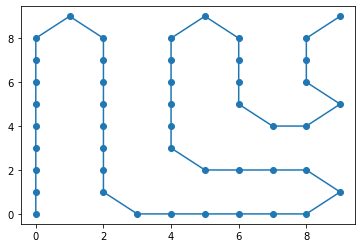

In [25]:
rows = [location[0] for location in path_dfs]
cols = [location[1] for location in path_dfs]
plt.plot(rows, cols, 'o-');

[(0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5), (6, 6), (7, 7), (8, 8), (9, 9)]


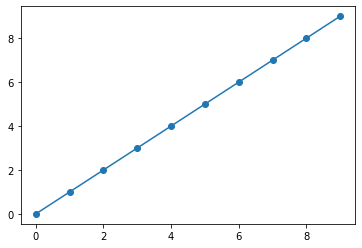

In [26]:
path_bfs = breadth_first_search((0, 0), (9, 9), grid_successors)
print(path_bfs)
rows = [location[0] for location in path_bfs]
cols = [location[1] for location in path_bfs]
plt.plot(rows, cols, 'o-');

In [27]:
depth_first_search((0, 0), (9, 20), grid_successors)

'Goal not found'

# Required Modification to the Grid Puzzle (worth 20 points)

Define a new function named `grid_successors_center_block` by copying the above `grid_successors` function and then modify it to add a square obstacle from coordinates (4, 4) to (6, 6).  Plot the path that results from doing breadth-first and depth-first searches with the start and goal states shown above.  Insert code cells and markdown cells here to do these steps.

*Define grid_successors_center_block here for 5 points.*

In [28]:
def grid_successors_center_block(state):
    row, col = state
    # succs will be list of tuples () rather than list of lists [] because state must
    # be an immutable type to serve as a key in dictionary of expanded nodes
    succs = []
    for r in [-1, 0, 1]:   #check each row
        for c in [-1, 0, 1]:  # check in each col
            newr = row + r
            newc = col + c
            #brute force method for blocking: list of all blocked tuples
            blocked = [(4,4), (4,5), (4,6), (5,4), (5,5), (5,6), (6,4), (6,5), (6,6)]
            if 0 <= newr <= 9 and 0 <= newc <= 9:
                #do not add to succs if it is a blocked state
                if (newr,newc) not in blocked:
                    succs.append( (newr, newc) )
    return succs

In order to implement grid_successors_center_block I created a list of tuples with all of the blocked states.  I then used an if statement to add only tuples not in the list of blocked states to succs.

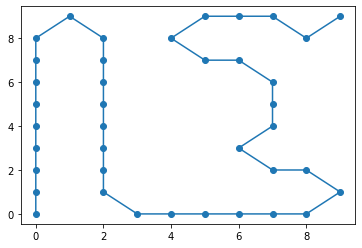

In [29]:
#DFS with center block
path_dfs_block = depth_first_search((0, 0), (9, 9), grid_successors_center_block)
rows = [location[0] for location in path_dfs_block]
cols = [location[1] for location in path_dfs_block]
plt.plot(rows, cols, 'o-');

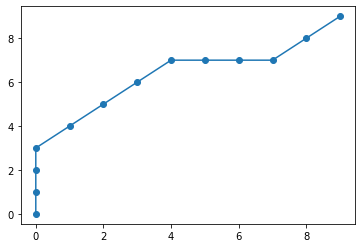

In [30]:
#BFS with center block
path_bfs_block = breadth_first_search((0, 0), (9, 9), grid_successors_center_block)
rows = [location[0] for location in path_bfs_block]
cols = [location[1] for location in path_bfs_block]
plt.plot(rows, cols, 'o-');

Above are the resulting plots for DFS and BFS using grid_successors_center block.  For both the DFS and BFS plots, the paths can been seen to be going "around" the center block.  For DFS the overall path length is about the same as or even shorter than without the center block.  This is because the detour around the center block for DFS brought the path closer to the goal than in the original path without the center block.  For BFS the overall path length is much longer.  This is because the original path ended up going directly towards the goal.  Therefore since the path has to go around the center block in this version, the path is strictly longer than in the original version.  

# Grading

Your notebook will be run and graded automatically. Download [A1grader.tar](http://www.cs.colostate.edu/~anderson/cs440/notebooks/A1grader.tar)  and extract A1grader.py from it. Run the code in the following cell to demonstrate an example grading session. You should see a perfect score of 80/80 if your functions are defined correctly. 

The remaining 20% will be based on your writing.  In markdown cells, explain what your functions are doing and make observations about your results.  Also mention problems you encountered in trying to solve this assignment.

# Check-in

Do not include this section in your notebook.

Name your notebook ```Lastname-A1.ipynb```.  So, for me it would be ```Anderson-A1.ipynb```.  Submit the file using the ```Assignment 1``` link on [Canvas](https://colostate.instructure.com/courses/109411).

In [31]:
%run -i A1grader.py


======================= Code Execution =======================

Extracting python code from notebook named 'Valdes-A1.ipynb' and storing in notebookcode.py
Removing all statements that are not function or class defs or import statements.

Searching this graph:
 {'a': ['b'], 'b': ['c', 'd'], 'c': ['e'], 'd': ['f', 'i'], 'e': ['g', 'h', 'i']}

Looking for path from a to b.
  Calling breadth_first_search(a, b, successorsf)
       and depth_first_search(a, b, successorsf)

10/10 points. Your breadth_first_search found correct solution path of ['a', 'b']
10/10 points. Your depth_first_search found correct solution path of ['a', 'b']

Looking for path from a to i.
  Calling breadth_first_search(a, i, successorsf)
      and depth_first_search(a, i, successorsf)

20/20 points. Your breadth_first_search found correct solution path of ['a', 'b', 'd', 'i']
20/20 points. Your depth_first_search found correct solution path of ['a', 'b', 'c', 'e', 'i']

Looking for nonexistent path from a to denver